# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [2]:
# Your code here
import pandas as pd 

df = pd.read_csv('titanic.csv', index_col=0)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C


Use the `.info()` method to quickly preview which features have missing data

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1391 entries, 1.0 to 839.0
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1391 non-null   float64
 1   Pclass    1391 non-null   object 
 2   Name      1391 non-null   object 
 3   Sex       1391 non-null   object 
 4   Age       1209 non-null   float64
 5   SibSp     1391 non-null   float64
 6   Parch     1391 non-null   float64
 7   Ticket    1391 non-null   object 
 8   Fare      1391 non-null   float64
 9   Cabin     602 non-null    object 
 10  Embarked  1289 non-null   object 
dtypes: float64(5), object(6)
memory usage: 170.4+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

mean: 29.731894127378
median: 27.0
standard deviation: 16.0701246034447


NameError: name 'plt' is not defined

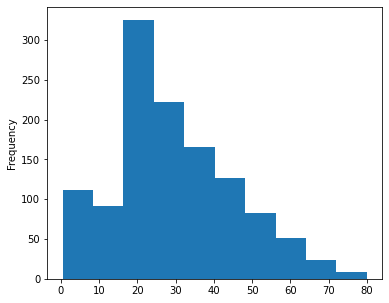

In [22]:
# Your code here
print(f"mean: {df['Age'].mean()}")
print(f"median: {df['Age'].median()}")
print(f"standard deviation: {df['Age'].std()}")

#pd.plotting.hist_frame(df, figsize=(10,10));

df['Age'].plot(kind='hist', figsize=(6,5))
plt.show()

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

14.98115547604539

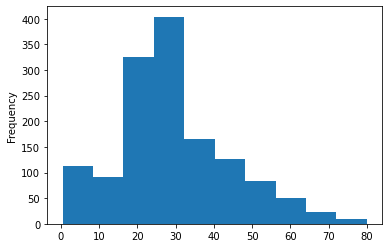

In [32]:
# Your code here
Age_mean_fill = df['Age'].fillna(df['Age'].mean()) 
Age_mean_fill.plot(kind = 'hist')

Age_mean_fill.std()


### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

15.009475778073455

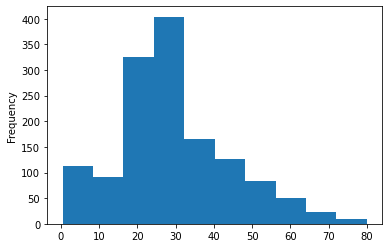

In [33]:
# Your code here
Age_median_fill = df['Age'].fillna(df['Age'].median()) 
Age_median_fill.plot(kind = 'hist')

Age_median_fill.std()

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

std: 16.0701246034447
mean: 29.731894127378
median: 27.0


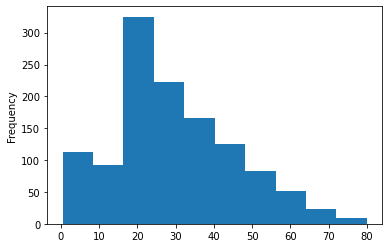

In [37]:
# Your code here
Age_drop_rows = df['Age'].dropna(axis = 0)

Age_drop_rows.plot(kind= 'hist')

print(f'std: {Age_drop_rows.std()}')
print(f'mean: {Age_drop_rows.mean()}')
print(f'median: {Age_drop_rows.median()}')

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.